Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Number of training samples: 5232
Number of testing samples: 624
Epoch 1/10
163/163 [==============================] - 693s 3s/step - loss: 0.3817 - accuracy: 0.8267 - val_loss: 0.4036 - val_accuracy: 0.8355
Epoch 2/10
163/163 [==============================] - 384s 2s/step - loss: 0.2685 - accuracy: 0.8890 - val_loss: 0.5176 - val_accuracy: 0.7911
Epoch 3/10
163/163 [==============================] - 385s 2s/step - loss: 0.2465 - accuracy: 0.8987 - val_loss: 0.2882 - val_accuracy: 0.8651
Epoch 4/10
163/163 [==============================] - 374s 2s/step - loss: 0.2314 - accuracy: 0.9102 - val_loss: 0.3356 - val_accuracy: 0.8816
Epoch 5/10
163/163 [==============================] - 371s 2s/step - loss: 0.1983 - accuracy: 0.9208 - val_loss: 0.2211 - val_accuracy: 0.9243
Epoch 6/10
163/163 [==============================] - 381s 2s/step - loss: 0.2135 - accuracy: 0.9183 - val_loss: 0.2833 - val_accuracy: 0.

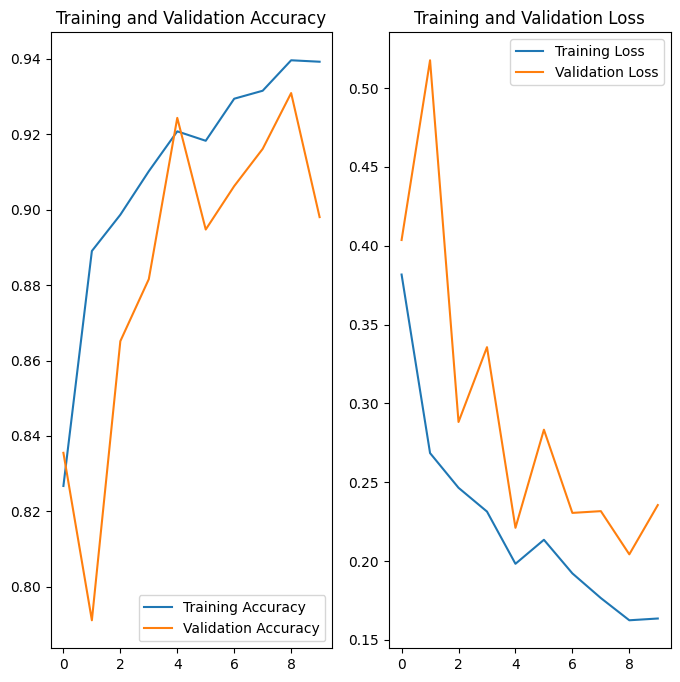

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define paths to the training and testing directories
train_dir = '/content/drive/MyDrive/chest_xray/train'  # Replace with your path to the training data directory
test_dir = '/content/drive/MyDrive/chest_xray/test'    # Replace with your path to the testing data directory

#data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Rescale pixel values from 0-255 to 0-1
    shear_range=0.2,        # Apply random shear transformations
    zoom_range=0.2,         # Apply random zoom transformations
    horizontal_flip=True    # Apply random horizontal flips
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test data

# Load and preprocess images from the directories
train_generator = train_datagen.flow_from_directory(
    train_dir,              # The directory with training data
    target_size=(150, 150), # Resize all images to 150x150
    batch_size=32,          # Number of images to yield per batch
    class_mode='binary'     # Binary classification (normal/pneumonia)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,               # The directory with testing data
    target_size=(150, 150), # Resize all images to 150x150
    batch_size=32,          # Number of images to yield per batch
    class_mode='binary'     # Binary classification (normal/pneumonia)
)

# number of samples to debug
print(f'Number of training samples: {train_generator.samples}')
print(f'Number of testing samples: {test_generator.samples}')

# samples in the dataset
if train_generator.samples == 0 or test_generator.samples == 0:
    raise ValueError("Training or testing directory is empty. Please ensure there are images in the directories.")

# Building the (CNN) model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),  # First convolutional layer
    MaxPooling2D(pool_size=(2, 2)),  # First max pooling layer
    Conv2D(64, (3, 3), activation='relu'),  # Second convolutional layer
    MaxPooling2D(pool_size=(2, 2)),  # Second max pooling layer
    Conv2D(128, (3, 3), activation='relu'),  # Third convolutional layer
    MaxPooling2D(pool_size=(2, 2)),  # Third max pooling layer
    Flatten(),  # Flatten the 3D output to 1D
    Dense(128, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Dropout layer for regularization
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,  # Training data generator
    steps_per_epoch=train_generator.samples // train_generator.batch_size,  # Number of steps per epoch
    validation_data=test_generator,  # Validation data generator
    validation_steps=test_generator.samples // test_generator.batch_size,  # Number of validation steps
    epochs=10  # Number of epochs
)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Plot the training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


1/1 [==============================] - 0s 55ms/step
The image is normal.


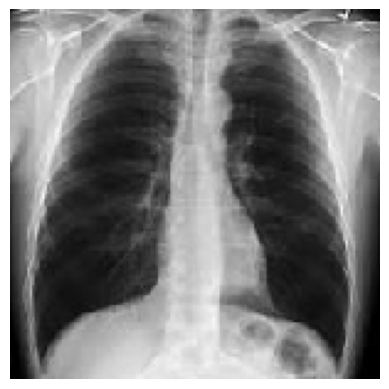

In [8]:
# Function to load and preprocess a single image
def load_and_preprocess_image(img_path, img_size=(150, 150)):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0
    return img

# Function to display an image
def display_image(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Path to the image
img_path = '/content/normal_img.jfif'  # Replace with your image path

# Load and preprocess the image
img = load_and_preprocess_image(img_path)

# Make prediction
prediction = model.predict(img)
if prediction[0] > 0.5:
    print("The image infected")
else:
    print("The image is normal.")

# Display the image
display_image(img_path)


1/1 [==============================] - 0s 38ms/step
The image is normal.


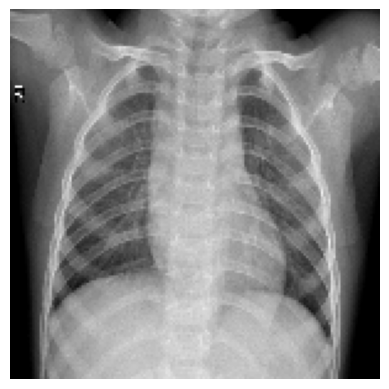

In [13]:
# Function to load and preprocess a single image
def load_and_preprocess_image(img_path, img_size=(150, 150)):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0
    return img

# Function to display an image
def display_image(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Path to the image
img_path = '/content/NORMAL-3322209-0001.jpeg'  # Replace with your image path

# Load and preprocess the image
img = load_and_preprocess_image(img_path)

# Make prediction
prediction = model.predict(img)
if prediction[0] > 0.5:
    print("The image is infected")
else:
    print("The image is normal.")

# Display the image
display_image(img_path)
